Primero importamos todo lo necesario para el análisis exploratorio de datos. 

In [64]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Carga de datos

In [65]:
usVideos = pd.read_csv('USvideos_cc50_202101.csv')

In [66]:
usVideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205)


In [67]:
usVideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40949 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  int64  
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  int64  
 8   likes                   40949 non-null  int64  
 9   dislikes                40949 non-null  int64  
 10  comment_count           40949 non-null  int64  
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error_or_removed  40949 non-null

In [68]:
# load data using Python JSON module
with open('US_category_id.json','r') as f:
    data = json.loads(f.read())

# Normalizing data
multiple_level_data = pd.json_normalize(data, record_path =['items'], meta =['kind','etag'], meta_prefix='config_params_', record_prefix='dbscan_')

# Saving to CSV format
multiple_level_data.to_csv('US_vategory_id.csv', index=False)

cat = pd.read_csv('US_vategory_id.csv')

In [69]:
cat.head()

,dbscan_kind,dbscan_etag,dbscan_id,dbscan_snippet.channelId,dbscan_snippet.title,dbscan_snippet.assignable,config_params_kind,config_params_etag
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv..."
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv..."
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv..."
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv..."
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv..."


In [70]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   dbscan_kind                32 non-null     object
 1   dbscan_etag                32 non-null     object
 2   dbscan_id                  32 non-null     int64 
 3   dbscan_snippet.channelId   32 non-null     object
 4   dbscan_snippet.title       32 non-null     object
 5   dbscan_snippet.assignable  32 non-null     bool  
 6   config_params_kind         32 non-null     object
 7   config_params_etag         32 non-null     object
dtypes: bool(1), int64(1), object(6)
memory usage: 1.9+ KB


Ahora que contamos con el dataset principal de videos de youtube y las categorías, debemos unirlos.

In [71]:
newUSVideos = usVideos.merge(cat, left_on='category_id',right_on='dbscan_id', how='inner')

In [72]:
newUSVideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,lon,geometry,dbscan_kind,dbscan_etag,dbscan_id,dbscan_snippet.channelId,dbscan_snippet.title,dbscan_snippet.assignable,config_params_kind,config_params_etag
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,-111.950684,POINT (-111.950684 39.41922),youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv..."
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,...,-155.844437,POINT (-155.844437 19.741755),youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv..."
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,...,-96.921387,POINT (-96.921387 36.084621),youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv..."
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,...,-111.950684,POINT (-111.950684 39.41922),youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv..."
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,...,-100.000000,POINT (-100 41.5),youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv..."


In [73]:
newUSVideos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   video_id                   40949 non-null  object 
 1   trending_date              40949 non-null  object 
 2   title                      40949 non-null  object 
 3   channel_title              40949 non-null  object 
 4   category_id                40949 non-null  int64  
 5   publish_time               40949 non-null  object 
 6   tags                       40949 non-null  object 
 7   views                      40949 non-null  int64  
 8   likes                      40949 non-null  int64  
 9   dislikes                   40949 non-null  int64  
 10  comment_count              40949 non-null  int64  
 11  thumbnail_link             40949 non-null  object 
 12  comments_disabled          40949 non-null  bool   
 13  ratings_disabled           40949 non-null  boo

Una vez unidos elminaremos todas las columnas que no necesitamos para el análisis.

In [74]:
newUSVideos.drop(['dbscan_kind','dbscan_etag','dbscan_id','dbscan_snippet.channelId','dbscan_snippet.assignable',
                 'config_params_kind','config_params_etag'],axis=1,inplace=True)

In [75]:
newUSVideos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40949 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  int64  
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  int64  
 8   likes                   40949 non-null  int64  
 9   dislikes                40949 non-null  int64  
 10  comment_count           40949 non-null  int64  
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error_or_removed  40949 non-null

In [76]:
newUSVideos.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,dbscan_snippet.title
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,...,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Oklahoma,36.084621,-96.921387,POINT (-96.921387 36.084621),Shows
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,...,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205),Shows
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,...,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Vermont,44.000000,-72.699997,POINT (-72.699997 44),Shows
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,...,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",North Dakota,47.650589,-100.437012,POINT (-100.437012 47.650589),Shows
40948,V6ElE2xs48c,18.06.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1351321,22587,616,...,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Montana,46.965260,-109.533691,POINT (-109.533691 46.96526),Shows


In [77]:
newUSVideos["publish_time"]

0        2017-11-13T17:13:01.000Z
1        2017-04-21T06:47:32.000Z
2        2017-11-11T15:00:03.000Z
3        2017-11-11T18:08:04.000Z
4        2017-11-11T01:19:33.000Z
                   ...           
40944    2018-05-10T21:01:22.000Z
40945    2018-05-10T21:01:22.000Z
40946    2018-05-10T21:01:22.000Z
40947    2018-05-10T21:01:22.000Z
40948    2018-05-10T21:01:22.000Z
Name: publish_time, Length: 40949, dtype: object

In [78]:
#Retornar un objecto de forma yy mm dd para pasarlo a datetime
object_publish_time_ymd = pd.to_datetime(newUSVideos["publish_time"]).dt.strftime('%Y-%m-%d')

In [79]:
#Retornar un objecto de forma hh mm ss para pasarlo a datetime
object_publish_time_hms = pd.to_datetime(newUSVideos["publish_time"]).dt.strftime('%H:%M:%S')

In [80]:
object_publish_time_ymd

0        2017-11-13
1        2017-04-21
2        2017-11-11
3        2017-11-11
4        2017-11-11
            ...    
40944    2018-05-10
40945    2018-05-10
40946    2018-05-10
40947    2018-05-10
40948    2018-05-10
Name: publish_time, Length: 40949, dtype: object

In [81]:
object_publish_time_hms

0        17:13:01
1        06:47:32
2        15:00:03
3        18:08:04
4        01:19:33
           ...   
40944    21:01:22
40945    21:01:22
40946    21:01:22
40947    21:01:22
40948    21:01:22
Name: publish_time, Length: 40949, dtype: object

In [82]:
#Pasar la columna "publish_time" de tipo object a datetime
newUSVideos["publish_time"] = pd.to_datetime(object_publish_time_ymd)

In [83]:
newUSVideos["publish_time"]

0       2017-11-13
1       2017-04-21
2       2017-11-11
3       2017-11-11
4       2017-11-11
           ...    
40944   2018-05-10
40945   2018-05-10
40946   2018-05-10
40947   2018-05-10
40948   2018-05-10
Name: publish_time, Length: 40949, dtype: datetime64[ns]

In [84]:
newUSVideos["post_time"] = object_publish_time_hms

In [85]:
newUSVideos["post_time"]

0        17:13:01
1        06:47:32
2        15:00:03
3        18:08:04
4        01:19:33
           ...   
40944    21:01:22
40945    21:01:22
40946    21:01:22
40947    21:01:22
40948    21:01:22
Name: post_time, Length: 40949, dtype: object

In [86]:
#Falta transformar el dato atipico mes 14 no deberia existir
newUSVideos["trending_date"]

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40944    18.02.06
40945    18.03.06
40946    18.04.06
40947    18.05.06
40948    18.06.06
Name: trending_date, Length: 40949, dtype: object

In [87]:
#yy dd mm ===> yy mm dd
def convertStr(date_str):
    arr = list(date_str)
    dd = arr[3:5]
    mm = arr[6:8]
    arr[3:5] = mm
    arr[6:8] = dd
    return "".join(arr)
newUSVideos["trending_date"] = newUSVideos["trending_date"].apply(convertStr)

In [92]:
newUSVideos["trending_date"] = pd.to_datetime(newUSVideos["trending_date"], yearfirst=True)

In [93]:
newUSVideos["trending_date"]

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40944   2018-06-02
40945   2018-06-03
40946   2018-06-04
40947   2018-06-05
40948   2018-06-06
Name: trending_date, Length: 40949, dtype: datetime64[ns]

In [ ]:
newUSVideos.isna().sum()

Como podemos observar solo tenemos datos nulos o faltantes en la columna description, debido a que no es un dato muy relevante solo colocaremos "Without description" en lugar del null

In [ ]:
newUSVideos['description'] = newUSVideos['description'].fillna("Without description")

In [ ]:
newUSVideos.isna().sum()

In [ ]:
print(newUSVideos.duplicated(subset='video_id').sum())

Luego se hizo una revisión de cuantos "video_id" había repetidos y encontramos que eran cerca de un 90% del dataframe, por lo que se tendrá en consideración para un posible análisis posterior.

In [ ]:
plt.figure(figsize=(10, 100))
sns.boxplot(y='views',data=newUSVideos,palette='winter')

<AxesSubplot:ylabel='likes'>

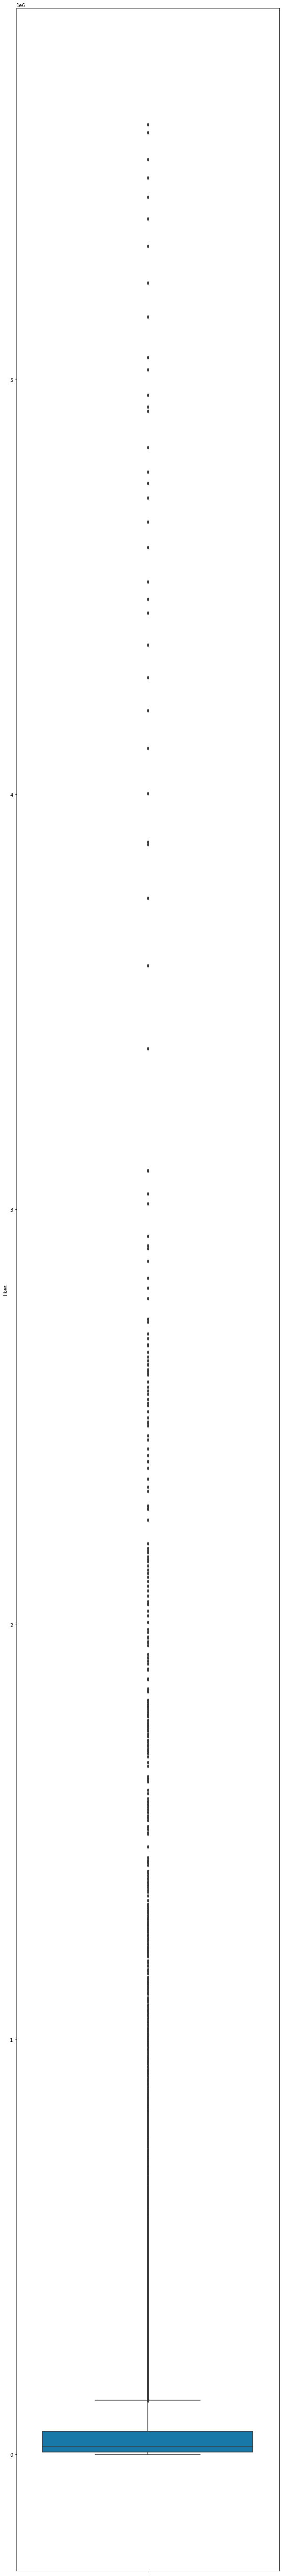

In [47]:
plt.figure(figsize=(10, 100))
sns.boxplot(y='likes',data=newUSVideos,palette='winter')

<AxesSubplot:ylabel='dislikes'>

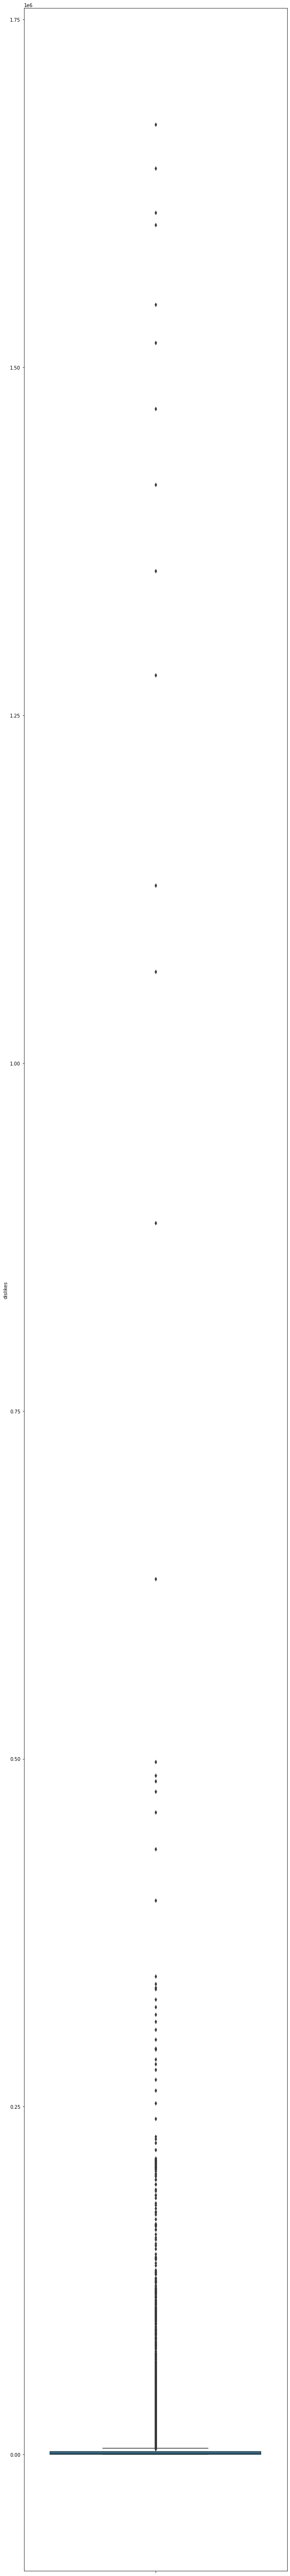

In [48]:
plt.figure(figsize=(10, 100))
sns.boxplot(y='dislikes',data=newUSVideos,palette='winter')

<AxesSubplot:ylabel='comment_count'>

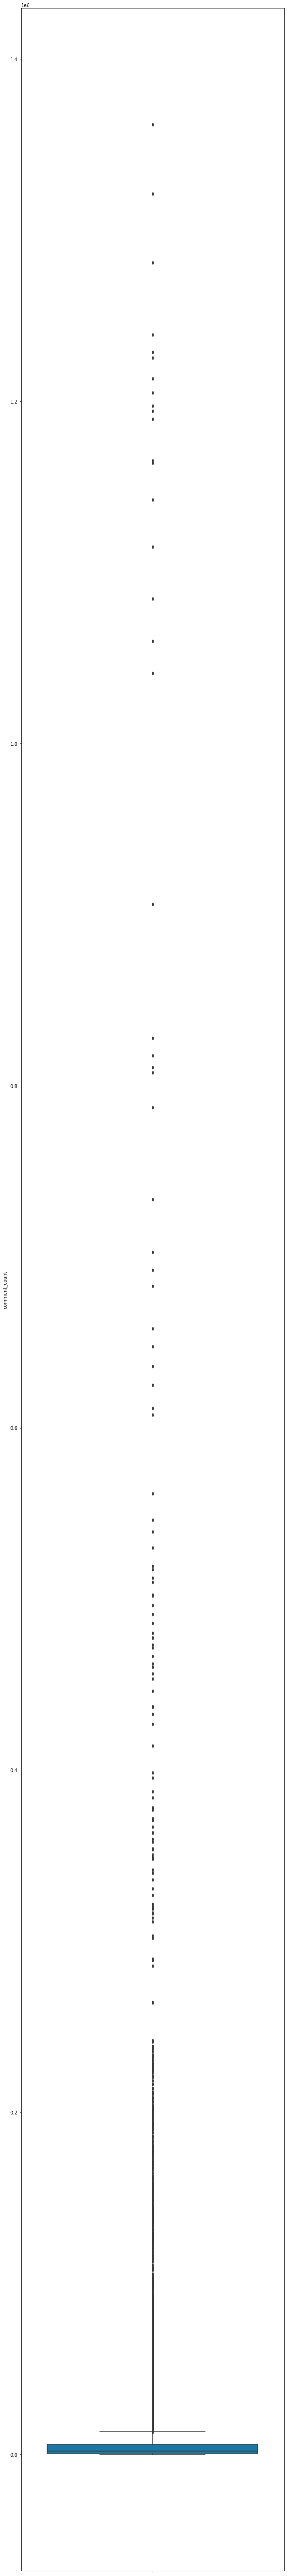

In [49]:
plt.figure(figsize=(10, 100))
sns.boxplot(y='comment_count',data=newUSVideos,palette='winter')

La cantidad de outliers que se pueden observar en los box plot es batante alta pero estos valores no se van a modificar ni reajustar pues se perdería demasiada información. Luego hicimos una verificación si existían valores negativos, estos serían considerados como atípicos.

In [57]:
newUSVideos[newUSVideos['views'] < 0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,dbscan_snippet.title,post_time


In [58]:
newUSVideos[newUSVideos['likes'] < 0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,dbscan_snippet.title,post_time


In [59]:
newUSVideos[newUSVideos['dislikes'] < 0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,dbscan_snippet.title,post_time


In [60]:
newUSVideos[newUSVideos['comment_count'] < 0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,dbscan_snippet.title,post_time
